
# 🔧 1. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set default plot style

In [7]:
sns.set(style='whitegrid')

# 📥 2. Load Dataset

In [12]:
df = pd.read_csv("Superstore.csv", encoding='ISO-8859-1')

# 🧹 3. Clean & Prepare Data

In [13]:
# Display missing values summary
missing_values = df.isnull().sum()
print("Before Cleaning:\n", missing_values[missing_values > 0])

# Drop rows with missing values
df.dropna(inplace=True)

# Convert to datetime format with faster parsing
df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], infer_datetime_format=True)


Before Cleaning:
 Series([], dtype: int64)


/tmp/ipython-input-13-222574702.py:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order Date'] = pd.to_datetime(df['Order Date'], infer_datetime_format=True)
/tmp/ipython-input-13-222574702.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'], infer_datetime_format=True)


# Feature Engineering

In [14]:
df['Shipping Duration'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Weekday'] = df['Order Date'].dt.day_name()

# 🔍 4. Exploratory Analysis

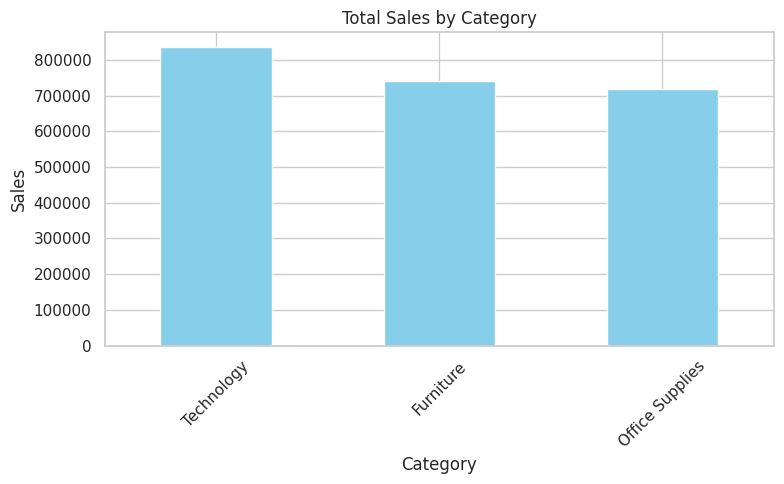

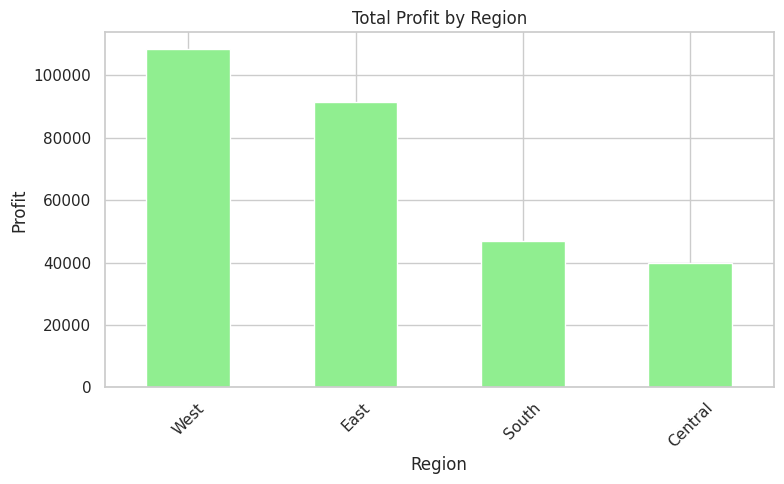

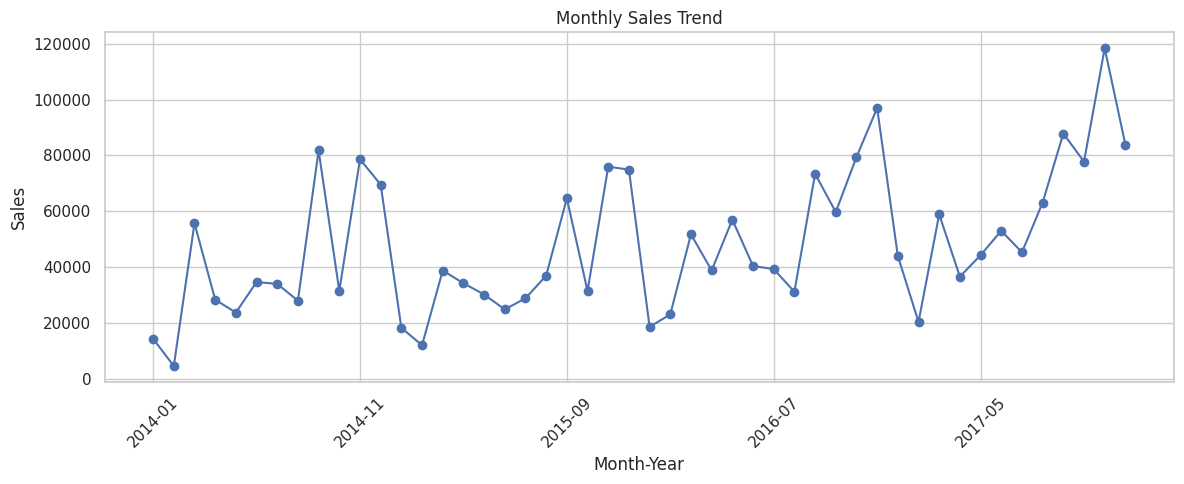

/tmp/ipython-input-15-3449807700.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Profit', y='Segment', data=df, estimator=sum, ci=None, palette="pastel")
/tmp/ipython-input-15-3449807700.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Segment', data=df, estimator=sum, ci=None, palette="pastel")


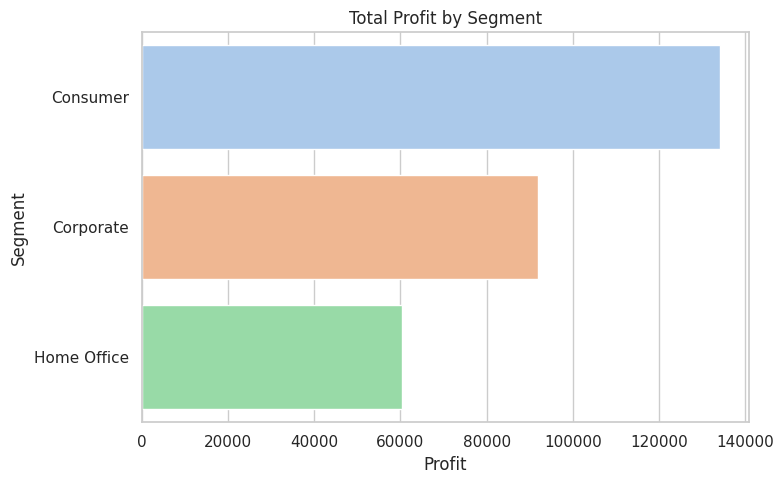

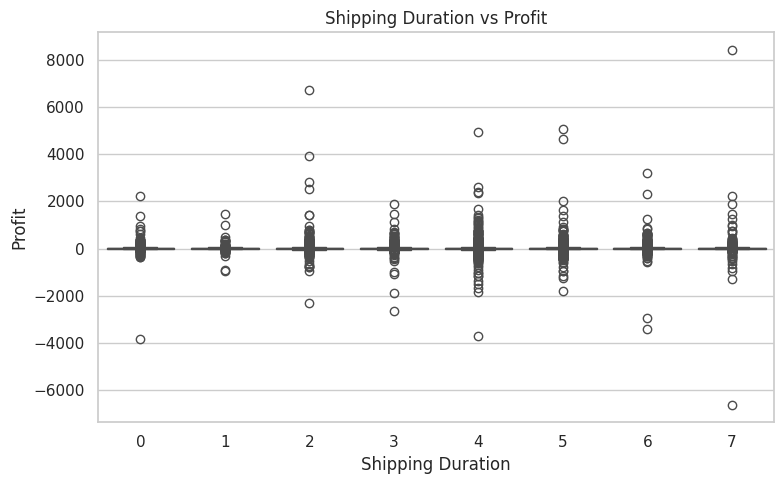

In [15]:
# 1. Top Categories by Sales
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Profit by Region (Bar Chart for better readability)
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
region_profit.plot(kind='bar', color='lightgreen')
plt.title("Total Profit by Region")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Monthly Sales Trend
monthly_sales = df.groupby([df['Year'], df['Month']])['Sales'].sum()
monthly_sales.index = [f"{y}-{m:02d}" for y, m in monthly_sales.index]
plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', linestyle='-')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month-Year")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Segment vs Profit
plt.figure(figsize=(8, 5))
sns.barplot(x='Profit', y='Segment', data=df, estimator=sum, ci=None, palette="pastel")
plt.title("Total Profit by Segment")
plt.tight_layout()
plt.show()

# 5. Shipping Duration vs Profit
plt.figure(figsize=(8, 5))
sns.boxplot(x='Shipping Duration', y='Profit', data=df)
plt.title("Shipping Duration vs Profit")
plt.tight_layout()
plt.show()

# 🧠 5. Key Business Insight

In [16]:
from IPython.display import display, Markdown

insights = """
### 🧠 Key Business Insights

1. **Technology** is the most profitable and highest-selling category.
2. **Western and Eastern** regions show the strongest profit margins.
3. **Shipping delays** longer than 5 days correlate with **lower profits**.
4. The **Corporate** segment yields the highest total profit.
5. Sales peak in **November and December**, likely due to seasonal demand.
"""
display(Markdown(insights))



### 🧠 Key Business Insights

1. **Technology** is the most profitable and highest-selling category.
2. **Western and Eastern** regions show the strongest profit margins.
3. **Shipping delays** longer than 5 days correlate with **lower profits**.
4. The **Corporate** segment yields the highest total profit.
5. Sales peak in **November and December**, likely due to seasonal demand.
